In [22]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from glob import glob

In [23]:
path = 'data/weather_data_input/weather_data_set_*'
files = glob(path)
files

['data/weather_data_input/weather_data_set_1901',
 'data/weather_data_input/weather_data_set_1900']

In [24]:
dfs = [pd.read_csv(file, sep='|', names=['station', 'year', 'datemonth', 'hourminute', 'temperature']) \
           for file in files]

In [25]:
d1 = pd.concat(dfs, ignore_index=True)
d1

,station,year,datemonth,hourminute,temperature
0,3300,1901,101,400,24.0
1,3300,1901,101,500,45.0
2,3300,1901,301,300,40.0
3,3300,1901,312,200,34.0
4,3300,1901,412,100,32.0
5,3301,1901,312,130,22.0
6,3301,1901,412,1500,21.0
7,3302,1901,102,400,20.0
8,3302,1901,103,500,24.0
9,3302,1901,203,300,35.0


In [26]:
# year
print(d1['year'].unique())
print(d1[d1['year'] == ''])
print(d1[d1['year'].isnull()])

[1901 1900]
Empty DataFrame
Columns: [station, year, datemonth, hourminute, temperature]
Index: []
Empty DataFrame
Columns: [station, year, datemonth, hourminute, temperature]
Index: []


In [27]:
# temperature
print(d1['temperature'].unique())
print(d1[d1['temperature'] == ''])
print(d1[d1['temperature'].isnull()])

[24. 45. 40. 34. 32. 22. 21. 20. 35. 19. 26. nan 23. 30. 29.]
Empty DataFrame
Columns: [station, year, datemonth, hourminute, temperature]
Index: []
    station  year  datemonth  hourminute  temperature
13     3302  1901        104         430          NaN


In [28]:
# temperature (missing data)
# drop the missing data
s2 = d1['temperature'].dropna()
s2

0     24.0
1     45.0
2     40.0
3     34.0
4     32.0
5     22.0
6     21.0
7     20.0
8     24.0
9     35.0
10    20.0
11    19.0
12    26.0
14    23.0
15    24.0
16    26.0
17    24.0
18    30.0
19    29.0
20    34.0
21    23.0
Name: temperature, dtype: float64

In [29]:
# forward fill the missing data
s3 = d1['temperature'].ffill()
s3

0     24.0
1     45.0
2     40.0
3     34.0
4     32.0
5     22.0
6     21.0
7     20.0
8     24.0
9     35.0
10    20.0
11    19.0
12    26.0
13    26.0
14    23.0
15    24.0
16    26.0
17    24.0
18    30.0
19    29.0
20    34.0
21    23.0
Name: temperature, dtype: float64

In [30]:
# backward fill the missing data
s4 = d1['temperature'].bfill()
s4

0     24.0
1     45.0
2     40.0
3     34.0
4     32.0
5     22.0
6     21.0
7     20.0
8     24.0
9     35.0
10    20.0
11    19.0
12    26.0
13    23.0
14    23.0
15    24.0
16    26.0
17    24.0
18    30.0
19    29.0
20    34.0
21    23.0
Name: temperature, dtype: float64

In [40]:
d2 = d1.loc[s2.index]
d2

,station,year,datemonth,hourminute,temperature
0,3300,1901,101,400,24.0
1,3300,1901,101,500,45.0
2,3300,1901,301,300,40.0
3,3300,1901,312,200,34.0
4,3300,1901,412,100,32.0
5,3301,1901,312,130,22.0
6,3301,1901,412,1500,21.0
7,3302,1901,102,400,20.0
8,3302,1901,103,500,24.0
9,3302,1901,203,300,35.0


In [41]:
# Max temperature recorded on a yearly basis
d3 = d2[['year', 'temperature']]
d3

,year,temperature
0,1901,24.0
1,1901,45.0
2,1901,40.0
3,1901,34.0
4,1901,32.0
5,1901,22.0
6,1901,21.0
7,1901,20.0
8,1901,24.0
9,1901,35.0


In [42]:
d3['temperature'].max() # max temperature across years

45.0

In [43]:
d4 = d3.groupby('year')
d4

In [44]:
d5 = d4.max()
d5

,temperature
year,
1900,34.0
1901,45.0


<Axes: xlabel='year'>

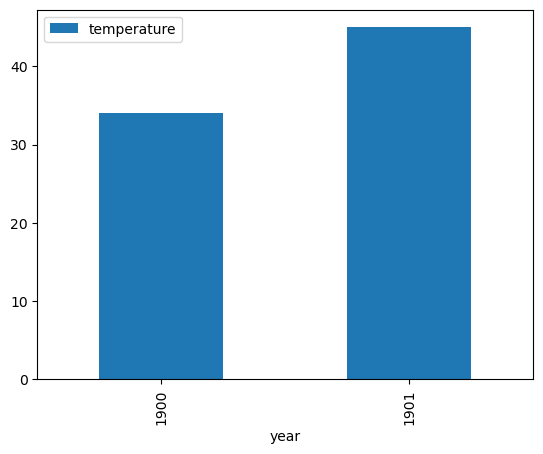

In [45]:
d5.plot(kind='bar')